In [2]:
import xarray as xr
import rioxarray as rxr

In [3]:
nc_file = "data/gfs/gdas.t00z.sfcanl.nc"
# 3. Open as a single concatenated Dataset
ds_sfcanl = xr.open_dataset(nc_file)

In [4]:
ds_sfcanl

<xarray.Dataset> Size: 1GB
Dimensions:  (grid_xt: 3072, grid_yt: 1536, time: 1)
Coordinates:
  * grid_xt  (grid_xt) float64 25kB 0.0 0.1172 0.2344 ... 359.6 359.8 359.9
  * grid_yt  (grid_yt) float64 12kB 89.91 89.79 89.68 ... -89.68 -89.79 -89.91
  * time     (time) object 8B 2025-06-05 00:00:00
Data variables: (12/62)
    lon      (grid_yt, grid_xt) float64 38MB ...
    lat      (grid_yt, grid_xt) float64 38MB ...
    alnsf    (time, grid_yt, grid_xt) float32 19MB ...
    alnwf    (time, grid_yt, grid_xt) float32 19MB ...
    alvsf    (time, grid_yt, grid_xt) float32 19MB ...
    alvwf    (time, grid_yt, grid_xt) float32 19MB ...
    ...       ...
    xtts     (time, grid_yt, grid_xt) float32 19MB ...
    xu       (time, grid_yt, grid_xt) float32 19MB ...
    xv       (time, grid_yt, grid_xt) float32 19MB ...
    xz       (time, grid_yt, grid_xt) float32 19MB ...
    xzts     (time, grid_yt, grid_xt) float32 19MB ...
    zc       (time, grid_yt, grid_xt) float32 19MB ...
Attributes:
    nsoil:    4
    source:   FV3GFS
    grid:     gaussian
    im:       3072
    jm:       1536

In [5]:
ds_sfcanl.tprcp.chunks

In [6]:
ds_sfcanl_tprcp = ds_sfcanl['tprcp']
ds_sfcanl_tprcp

<xarray.DataArray 'tprcp' (time: 1, grid_yt: 1536, grid_xt: 3072)> Size: 19MB
[4718592 values with dtype=float32]
Coordinates:
  * grid_xt  (grid_xt) float64 25kB 0.0 0.1172 0.2344 ... 359.6 359.8 359.9
  * grid_yt  (grid_yt) float64 12kB 89.91 89.79 89.68 ... -89.68 -89.79 -89.91
  * time     (time) object 8B 2025-06-05 00:00:00
Attributes:
    long_name:     total precipitation
    units:         kg/m**2
    missing:       9.99e+20
    cell_methods:  time: point
    output_file:   sfc

In [7]:
ds_sfcanl_tprcp_masked = ds_sfcanl_tprcp.where(ds_sfcanl_tprcp != ds_sfcanl_tprcp.attrs['missing'])

In [8]:
us_tprcp = ds_sfcanl_tprcp_masked.sel(grid_xt=slice(((180-125.5)+180), ((180-64)+180)),grid_yt=slice(50.2, 22))

In [9]:
us_tprcp = us_tprcp.squeeze()

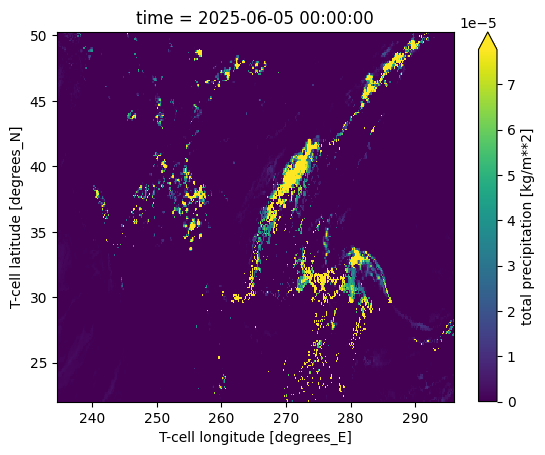

In [10]:
us_tprcp.plot(robust=True) #Robust looks at figures between 2-98 percentile

In [11]:
us_tprcp_4326 = us_tprcp.rio.write_crs("EPSG:4326")


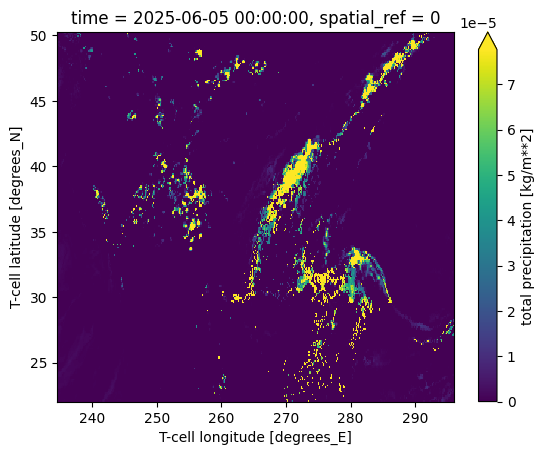

In [12]:
us_tprcp_4326.plot(robust=True)

In [ ]:
us_tprcp_4326_dims = us_tprcp_4326.rio.set_spatial_dims("grid_xt", "grid_yt")

In [14]:
us_tprcp_5070 = us_tprcp_4326_dims.rio.reproject("EPSG:5070")

In [15]:
us_tprcp_5070

<xarray.DataArray 'tprcp' (y: 330, x: 598)> Size: 789kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(330, 598), dtype=float32)
Coordinates:
  * x            (x) float64 5kB -3.055e+06 -3.044e+06 ... 3.293e+06 3.304e+06
  * y            (y) float64 3kB 3.407e+06 3.397e+06 ... -8.629e+04 -9.694e+04
    time         object 8B 2025-06-05 00:00:00
    spatial_ref  int64 8B 0
Attributes:
    long_name:     total precipitation
    units:         kg/m**2
    missing:       9.99e+20
    cell_methods:  time: point
    output_file:   sfc
    _FillValue:    nan

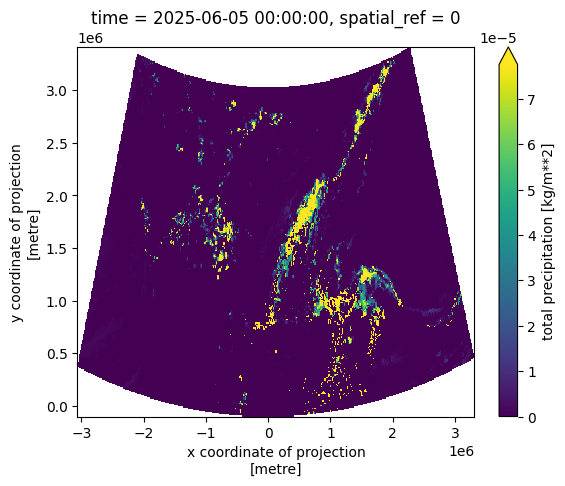

In [16]:
us_tprcp_5070.plot(robust=True)

In [17]:
us_tprcp_5070.to_netcdf("data/gfs/total_precip_5070.nc")